In [1]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [2]:
# code here
df=pd.read_csv('https://tinyurl.com/2pfhncqw')

In [10]:
df=df[['verification_status',"contract_type", "rarity_score" , "last_sale_price"]]

In [12]:
df

,verification_status,contract_type,rarity_score,last_sale_price
0,verified,own,2.000000,1.266732
1,verified,own,97.077216,1.200357
2,verified,own,139.453086,3.180572
3,verified,own,127.753445,3.502910
4,verified,own,112.315719,4.009567
...,...,...,...,...
309905,approved,default,128.268842,0.001571
309906,approved,default,152.040769,0.001661
309907,approved,default,178.734807,0.008480
309908,approved,default,130.974464,0.004236


In [19]:
df.pivot_table(index=['verification_status'], columns=[ 'contract_type']  ,values= ['rarity_score','last_sale_price'],aggfunc='sum')

last_sale_price                 rarity_score              
contract_type               default            own       default           own
verification_status                                                           
approved                 658.931935    1684.819488  3.973082e+08  3.929607e+06
verified                 370.304092  667394.862655  2.475007e+06  4.165654e+07

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [20]:
# code here

df=pd.read_csv('https://tinyurl.com/2r24n45l')

In [35]:
df=df[(df['Year']>=2018) & (df['Year']<2023)]

<Axes: ylabel='Density'>

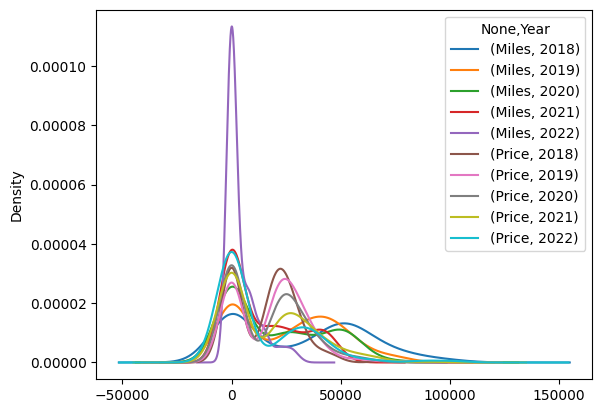

In [39]:
df.pivot_table(index=['Name'], columns=['Year'],values=['Miles','Price'],aggfunc=({
    'Miles':'median',
    'Price':'mean'}),fill_value=0).plot(kind="kde")

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [59]:
# code here
df=pd.read_csv('https://tinyurl.com/2nq6kugt')

In [60]:
df['required']=df['Actual(MU)']-df['Excess(+) / Shortfall (-)']

In [61]:
df['Dates']=pd.to_datetime(df['Dates'])

In [62]:
df['Month']=df['Dates'].dt.month_name()

<Axes: xlabel='Power Station'>

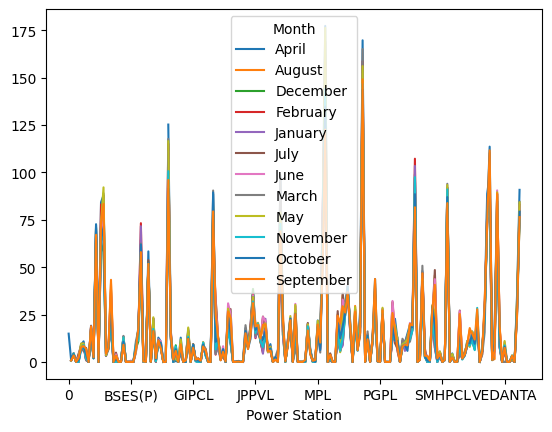

In [67]:
df.pivot_table(index='Power Station',columns='Month')['Actual(MU)'].plot()

In [56]:
df['Power Station'].value_counts().head(10)

,count
Power Station,
NTPC Ltd.,9570
NHPC,5742
NPCIL,5742
GMR ENERG,5742
JSWEL,3828
TATA PCL,3828
IBPIL,3828
APL,3828
JPPVL,3828


###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
# code here
df=pd.read_csv('/content/drive/MyDrive/Learn_DS_dataset/question-answer.csv')

In [86]:
new_df=pd.DataFrame(columns=[['ans','question']])
new_df['ans']=df[df['2'].str.contains('^Ans[0123456789]+')]['2'].values

In [87]:
new_df

,ans,question
0,"Ans1-Data Science combines statistics, maths, ...",NaN
1,Ans2-Logistic regression measures the relation...,NaN
2,Ans3-A random forest is built up of a number o...,NaN
3,Ans4-Overfitting refers to a model that is onl...,NaN
4,Ans5-The following are ways to handle missing ...,NaN
5,Ans6-Bag of Words is a representation of text ...,NaN
6,Ans7-Machine learning classification algorithm...,NaN
7,Ans8-A time series is a set of observations or...,NaN
8,Ans9-The principle behind causal forecasting i...,NaN
9,Ans10-(INNER) JOIN: Returns records that have ...,NaN


In [99]:
new_df['question']=df[df['2'].str.contains('^Q[0123456789]+')]['2'].values

In [89]:
new_df

,ans,question
0,"Ans1-Data Science combines statistics, maths, ...",Q1-What is Data Science?
1,Ans2-Logistic regression measures the relation...,Q2-2. How is logistic regression done?
2,Ans3-A random forest is built up of a number o...,Q3-How do you build a random forest model?
3,Ans4-Overfitting refers to a model that is onl...,Q4-How can you avoid overfitting your model?
4,Ans5-The following are ways to handle missing ...,Q5-You are given a data set consisting of vari...
5,Ans6-Bag of Words is a representation of text ...,Q6-What is bag of words? How we can use it for...
6,Ans7-Machine learning classification algorithm...,Q7-How can we use machine learning for text cl...
7,Ans8-A time series is a set of observations or...,Q8-What is a time series?
8,Ans9-The principle behind causal forecasting i...,Q9-How is time series different from the usual...
9,Ans10-(INNER) JOIN: Returns records that have ...,Q10-What are the different types of joins? Wha...


###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [93]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   (ans,)       10 non-null     object
 1   (question,)  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [96]:
# code here
new_df['question'].str.contains('?')

AttributeError: 'DataFrame' object has no attribute 'str'

###`Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [206]:
# code here
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

In [207]:
log_file['month']=pd.to_datetime(log_file['dt']).dt.month_name()

In [208]:
df=pd.merge(employee,log_file,left_on=['EMPLOYEE_ID'], right_on=['emp_id'])

In [180]:
df[df['month']=='January']['FIRST_NAME'].value_counts()

,count
FIRST_NAME,
Payam,3
Lex,2
Matthew,2
Ki,2
James,2
Shelli,2
Jason,1
Steven,1
Kevin,1


In [181]:
df[pd.to_datetime(df['dt']).dt.day_name().isin(['Saturday','Sunday'])]['FIRST_NAME'].value_counts()

,count
FIRST_NAME,
Daniel,5
James,5
Alexander,5
Joshua,4
Hazel,4
Matthew,4
Den,4
Stephen,4
Lex,4


In [182]:
df

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,emp_id,activity,eqpt,month
0,100,Steven,King,SKING,1116,2022-05-03,Dept2,100,Checking,CPU,May
1,100,Steven,King,SKING,1139,2022-05-26,Dept2,100,Cleaning,UPS,May
2,100,Steven,King,SKING,1181,2022-07-07,Dept6,100,Cleaning,CPU,July
3,100,Steven,King,SKING,1191,2022-07-17,Dept4,100,Cleaning,Server,July
4,100,Steven,King,SKING,1269,2022-10-03,Dept6,100,Repair,UPS,October
...,...,...,...,...,...,...,...,...,...,...,...
290,140,Joshua,Patel,JPATEL,1234,2022-08-29,Dept4,140,Repair,Fan,August
291,140,Joshua,Patel,JPATEL,1253,2022-09-17,Dept4,140,Checking,AC,September
292,140,Joshua,Patel,JPATEL,1281,2022-10-15,Dept4,140,Inspection,CPU,October
293,140,Joshua,Patel,JPATEL,1329,2022-12-02,Dept2,140,Cleaning,CPU,December


In [183]:
df[~pd.to_datetime(df['dt']).dt.day_name().isin(['Saturday','Sunday'])]['activity'].value_counts()

,count
activity,
Inspection,62
Cleaning,55
Repair,51
Checking,49


In [184]:
df['day']=pd.to_datetime(df['dt']).dt.day_name()

In [185]:
df

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,emp_id,activity,eqpt,month,day
0,100,Steven,King,SKING,1116,2022-05-03,Dept2,100,Checking,CPU,May,Tuesday
1,100,Steven,King,SKING,1139,2022-05-26,Dept2,100,Cleaning,UPS,May,Thursday
2,100,Steven,King,SKING,1181,2022-07-07,Dept6,100,Cleaning,CPU,July,Thursday
3,100,Steven,King,SKING,1191,2022-07-17,Dept4,100,Cleaning,Server,July,Sunday
4,100,Steven,King,SKING,1269,2022-10-03,Dept6,100,Repair,UPS,October,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
290,140,Joshua,Patel,JPATEL,1234,2022-08-29,Dept4,140,Repair,Fan,August,Monday
291,140,Joshua,Patel,JPATEL,1253,2022-09-17,Dept4,140,Checking,AC,September,Saturday
292,140,Joshua,Patel,JPATEL,1281,2022-10-15,Dept4,140,Inspection,CPU,October,Saturday
293,140,Joshua,Patel,JPATEL,1329,2022-12-02,Dept2,140,Cleaning,CPU,December,Friday


In [186]:
df.pivot_table(index='day',columns='activity',aggfunc='count')

EMAIL                            EMPLOYEE_ID                      \
activity  Checking Cleaning Inspection Repair    Checking Cleaning Inspection   
day                                                                             
Friday           7       15         15      8           7       15         15   
Monday           9        9         11     12           9        9         11   
Saturday         9        8          6     11           9        8          6   
Sunday          11        9         13     11          11        9         13   
Thursday         8       14         14     11           8       14         14   
Tuesday         12        8         13     11          12        8         13   
Wednesday       13        9          9      9          13        9          9   

                 FIRST_NAME                            LAST_NAME           \
activity  Repair   Checking Cleaning Inspection Repair  Checking Cleaning   
day                                                                         
Friday         8          7       14         12      8         7       15   
Monday        12          8        9         11     11         9        9   
Saturday      11          8        8          6     10         9        8   
Sunday        11         11        9         12     11        11        9   
Thursday      11          8       13         11     11         8       14   
Tuesday       11         12        8         13     11        12        8   
Wednesday      9         13        9          9      8        13        9   

                              Log_ID                                dept  \
activity  Inspection Repair Checking Cleaning Inspection Repair Checking   
day                                                                        
Friday            15      8        7       15         15      8        7   
Monday            11     12        9        9         11     12        9   
Saturday           6     11        9        8          6     11        9   
Sunday            13     11       11        9         13     11       11   
Thursday          14     11        8       14         14     11        8   
Tuesday           13     11       12        8         13     11       12   
Wednesday          9      9       13        9          9      9       13   

                                           dt                             \
activity  Cleaning Inspection Repair Checking Cleaning Inspection Repair   
day                                                                        
Friday          15         15      8        7       15         15      8   
Monday           9         11     12        9        9         11     12   
Saturday         8          6     11        9        8          6     11   
Sunday           9         13     11       11        9         13     11   
Thursday        14         14     11        8       14         14     11   
Tuesday          8         13     11       12        8         13     11   
Wednesday        9          9      9       13        9          9      9   

            emp_id                                eqpt                      \
activity  Checking Cleaning Inspection Repair Checking Cleaning Inspection   
day                                                                          
Friday           7       15         15      8        7       15         15   
Monday           9        9         11     12        9        9         11   
Saturday         9        8          6     11        9        8          6   
Sunday          11        9         13     11       11        9         13   
Thursday         8       14         14     11        8       14         14   
Tuesday         12        8         13     11       12        8         13   
Wednesday       13        9          9      9       13        9          9   

                    month                             
activity  Repair Checking Cleaning Inspection Repair  
day               

### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [ ]:
df=pd.merge(employee,log_file,left_on=['EMPLOYEE_ID'], right_on=['emp_id'])

In [209]:
df['Need']=df['EMAIL'].str.len()-df['LAST_NAME'].str.len()

In [203]:
df['Need_char']=df['EMAIL'].str[:df['Need']]

In [212]:
df.iloc[[92,93,94]]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,emp_id,activity,eqpt,month,Need
92,112,NaN,Urman,JMURMAN,1002,2022-01-09,Dept3,112,Inspection,CPU,January,2
93,112,NaN,Urman,JMURMAN,1021,2022-01-28,Dept3,112,Cleaning,AC,January,2
94,112,NaN,Urman,JMURMAN,1059,2022-03-07,Dept2,112,Repair,Battery,March,2


In [239]:
df.iloc[[92,93,94]]['EMAIL'].str[:(df['EMAIL'].str.len()-df['LAST_NAME'].str.len())[0]+1]

,EMAIL
92,JM
93,JM
94,JM


In [240]:
df['FIRST_NAME'].fillna(df['EMAIL'].str[:(df['EMAIL'].str.len()-df['LAST_NAME'].str.len())[0]+1],inplace=True)

In [245]:
df['EMAIL']=df['EMAIL']+'@CAMPUSX.COM'

In [248]:
df[(df['FIRST_NAME'].str.startswith('A') )& (df['activity'].isin(['Incpection', 'Cleaning', 'Checking'])) ]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,emp_id,activity,eqpt,month,Need
26,103,Alexander,Hunold,AHUNOLD@CAMPUSX.COM,1093,2022-04-10,Dept2,103,Checking,AC,April,1
28,103,Alexander,Hunold,AHUNOLD@CAMPUSX.COM,1224,2022-08-19,Dept1,103,Cleaning,AC,August,1
30,103,Alexander,Hunold,AHUNOLD@CAMPUSX.COM,1294,2022-10-28,Dept6,103,Checking,Battery,October,1
108,115,Alexander,Khoo,AKHOO@CAMPUSX.COM,1000,2022-01-07,Dept6,115,Cleaning,UPS,January,1
109,115,Alexander,Khoo,AKHOO@CAMPUSX.COM,1038,2022-02-14,Dept2,115,Cleaning,Fan,February,1
112,115,Alexander,Khoo,AKHOO@CAMPUSX.COM,1293,2022-10-27,Dept4,115,Checking,CPU,October,1
113,115,Alexander,Khoo,AKHOO@CAMPUSX.COM,1322,2022-11-25,Dept2,115,Cleaning,Fan,November,1
115,115,Alexander,Khoo,AKHOO@CAMPUSX.COM,1332,2022-12-05,Dept3,115,Checking,UPS,December,1


In [ ]:
# code here
df['FIRST_NAME'].fillna(df[''])